In [1]:
# Import all necessary libraries.
import os
import cv2
import numpy as np
import sys
import json
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import warnings
from collections import Counter
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../../../')

# specify the path to Mask_RCNN if you placed it outside Nomeroff-net project
MASK_RCNN_DIR = os.path.join(NOMEROFF_NET_DIR, 'Mask_RCNN')

MASK_RCNN_LOG_DIR = os.path.join(NOMEROFF_NET_DIR, 'logs')
OPTIONS_MODEL_PATH =  os.path.join(NOMEROFF_NET_DIR, "models/numberplate_options_2019_05_20.h5")

sys.path.append(NOMEROFF_NET_DIR)

In [2]:
# Import license plate recognition tools.
from NomeroffNet import  filters, RectDetector, TextDetector, OptionsDetector, Detector, textPostprocessing, textPostprocessingAsync

optionsDetector = OptionsDetector({
    "class_region": ["xx_unknown", "eu_ua_2015", "eu_ua_2004", "eu_ua_1995", "eu", "xx_transit", "ru", "kz"]
})
optionsDetector.load(OPTIONS_MODEL_PATH)

Using TensorFlow backend.
W0521 10:00:11.563186 140596061488960 deprecation_wrapper.py:119] From /mnt/data/var/www/html2/js/nomeroff-net_2/NomeroffNet/Detector.py:12: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0521 10:00:11.563859 140596061488960 deprecation_wrapper.py:119] From /mnt/data/var/www/html2/js/nomeroff-net_2/NomeroffNet/Detector.py:14: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0521 10:00:11.854937 140596061488960 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0521 10:00:11.858585 140596061488960 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0521 10:00:11.867048 140596061488960 deprecation_wrapper.py:

In [10]:
def optionChecker(datasetDir, imgFormat="png", partSize=100):
    ann = "ann"
    img = "img"
    annDir = os.path.join(datasetDir, ann)
    imgDir = os.path.join(datasetDir, img)
    
    imgFnames        = []
    predictedRegions = []
    nottedRegions    = []
    nottedStates     = []
    zones            = []
    annFnames        = []
    annData          = []
    i = 0
    counter = Counter()
    for dirName, subdirList, fileList in os.walk(annDir):
        for fname in fileList:
            ann_path = os.path.join(annDir, fname)
            
            i += 1
            annFnames.append(ann_path)
            with open(ann_path) as jsonR:
                data = json.load(jsonR)
            img_name = data["name"]
            annData.append(data)
            
            img_path = os.path.join(imgDir, "{}.{}".format(img_name, imgFormat))
            zones.append(cv2.cvtColor(mpimg.imread(img_path), cv2.COLOR_RGB2BGR))
            
            imgFnames.append(img_path)
            nottedRegions.append(data["region_id"])
            nottedStates.append(data["state_id"])
            if i >= partSize:
                # find standart
                regionIds, stateIds = optionsDetector.predict(zones)
                for regionId, stateId, zone, nottedRegion, nottedState, imgFname, annFname, annItem in zip(regionIds, stateIds, zones, nottedRegions, nottedStates, imgFnames, annFnames, annData):
                    if int(regionId) != int(nottedRegion):
                        if 'moderation' in annItem:
                            with open(annFname, "w") as jsonW:
                                annItem['moderation']['isModerated'] = 0
                                json.dump(annItem, jsonW)
                        print("REGION NOT CORRECT IN {}".format(imgFname))
                        print("PREDICTED: {}".format(regionId))
                        print("ANNOTATED: {}".format(nottedRegion))
                        plt.imshow(cv2.cvtColor(zone, cv2.COLOR_RGB2BGR))
                        plt.show()
                        counter["BAD"] += 1
                    else:
                        counter["GOOD"] += 1
                    if int(stateId) != int(nottedState):
                        print("STATE NOT CORRECT IN {}".format(imgFname))
                        print("PREDICTED: {}".format(stateId))
                        print("ANNOTATED: {}".format(nottedState))
                        plt.imshow(cv2.cvtColor(zone, cv2.COLOR_RGB2BGR))
                        plt.show()
                        counter["BAD"] += 1
                    else:
                        counter["GOOD"] += 1
                    
                imgFnames        = []
                predictedRegions = []
                nottedRegions    = []
                nottedStates     = []
                zones            = []
    print(counter)

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero247023527-0.png
PREDICTED: 3
ANNOTATED: 0


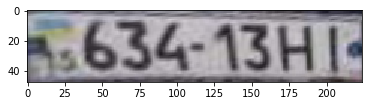

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero247023527-0.png
PREDICTED: 2
ANNOTATED: 0


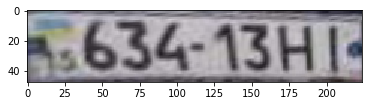

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/257960150.png
PREDICTED: 2
ANNOTATED: 1


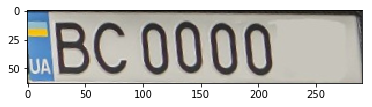

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/259975885.png
PREDICTED: 1
ANNOTATED: 4


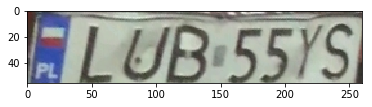

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260222557.png
PREDICTED: 4
ANNOTATED: 0


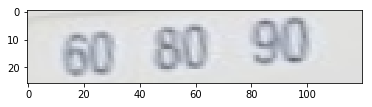

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260222557.png
PREDICTED: 2
ANNOTATED: 0


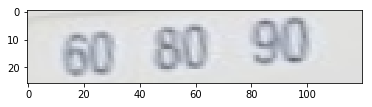

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero246943669-0.png
PREDICTED: 0
ANNOTATED: 1


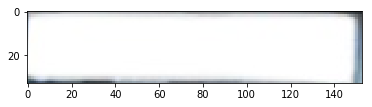

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/257960208.png
PREDICTED: 2
ANNOTATED: 1


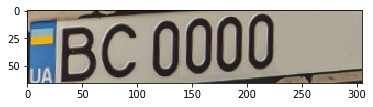

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero245295375-0.png
PREDICTED: 0
ANNOTATED: 1


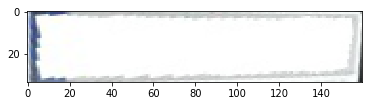

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260243658.png
PREDICTED: 1
ANNOTATED: 0


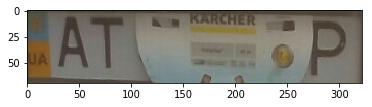

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260918658.png
PREDICTED: 0
ANNOTATED: 4


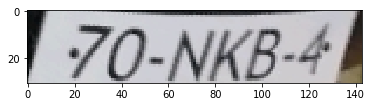

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero246943558-0.png
PREDICTED: 0
ANNOTATED: 1


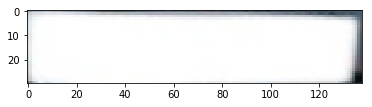

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero246944839-0.png
PREDICTED: 0
ANNOTATED: 1


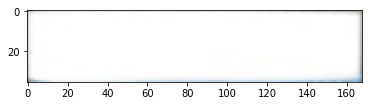

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260245710.png
PREDICTED: 1
ANNOTATED: 4


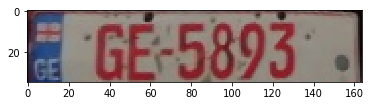

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260029515.png
PREDICTED: 2
ANNOTATED: 1


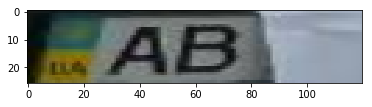

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260716849.png
PREDICTED: 4
ANNOTATED: 0


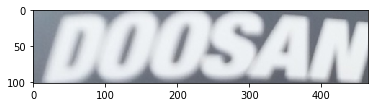

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260984184.png
PREDICTED: 4
ANNOTATED: 2


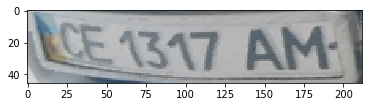

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260053189.png
PREDICTED: 4
ANNOTATED: 1


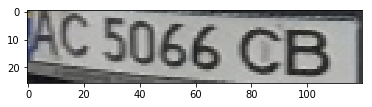

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero248062557-0.png
PREDICTED: 0
ANNOTATED: 1


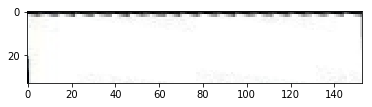

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/259504775euro.jpegzone1.png
PREDICTED: 0
ANNOTATED: 3


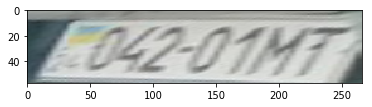

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260748299.png
PREDICTED: 7
ANNOTATED: 0


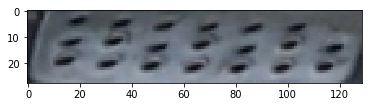

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260748299.png
PREDICTED: 2
ANNOTATED: 0


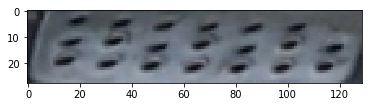

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260245005.png
PREDICTED: 1
ANNOTATED: 0


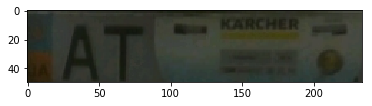

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260699368.png
PREDICTED: 2
ANNOTATED: 1


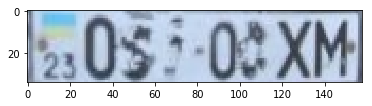

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/D777EFR.png
PREDICTED: 4
ANNOTATED: 7


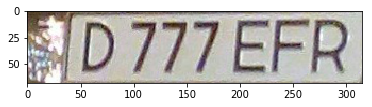

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/261169252.png
PREDICTED: 3
ANNOTATED: 0


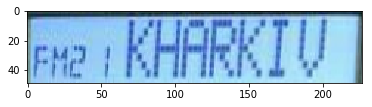

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260584719.png
PREDICTED: 1
ANNOTATED: 4


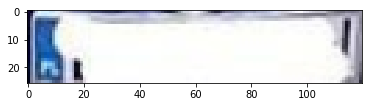

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero247133422-0.png
PREDICTED: 1
ANNOTATED: 0


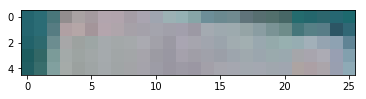

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260653672.png
PREDICTED: 4
ANNOTATED: 3


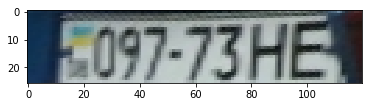

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260597794.png
PREDICTED: 1
ANNOTATED: 4


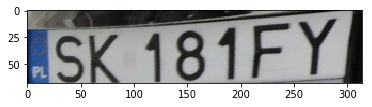

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero246944842-0.png
PREDICTED: 0
ANNOTATED: 1


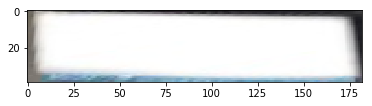

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260647677.png
PREDICTED: 2
ANNOTATED: 1


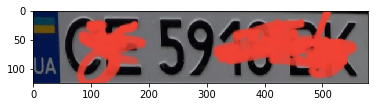

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/259939395.png
PREDICTED: 0
ANNOTATED: 4


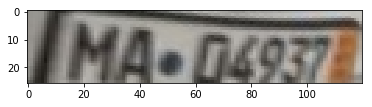

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/259939395.png
PREDICTED: 0
ANNOTATED: 2


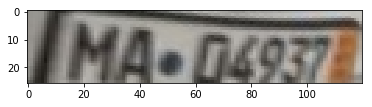

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260099149.png
PREDICTED: 2
ANNOTATED: 0


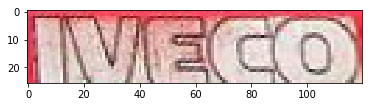

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260115338.png
PREDICTED: 1
ANNOTATED: 0


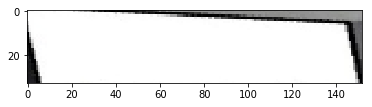

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260251417.png
PREDICTED: 4
ANNOTATED: 0


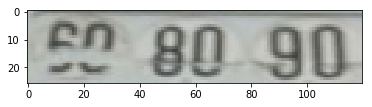

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260251417.png
PREDICTED: 2
ANNOTATED: 0


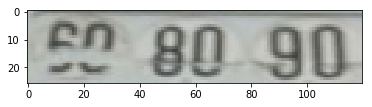

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260251911.png
PREDICTED: 7
ANNOTATED: 0


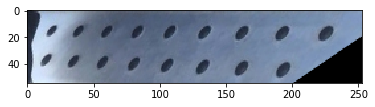

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260072852.png
PREDICTED: 2
ANNOTATED: 1


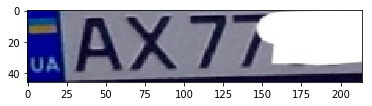

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260232474.png
PREDICTED: 4
ANNOTATED: 1


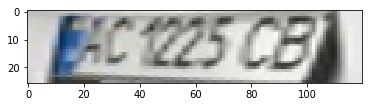

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260031705.png
PREDICTED: 0
ANNOTATED: 2


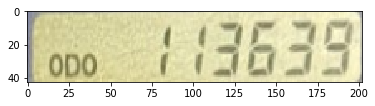

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260684190.png
PREDICTED: 2
ANNOTATED: 0


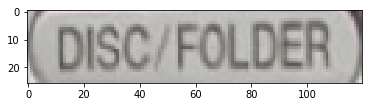

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/261380476.png
PREDICTED: 2
ANNOTATED: 0


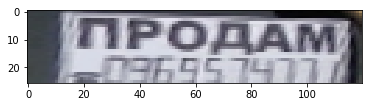

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero245295378-0.png
PREDICTED: 0
ANNOTATED: 1


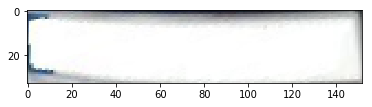

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260593655.png
PREDICTED: 1
ANNOTATED: 4


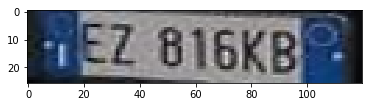

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260053019.png
PREDICTED: 0
ANNOTATED: 3


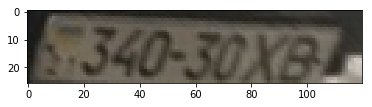

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260117310.png
PREDICTED: 2
ANNOTATED: 3


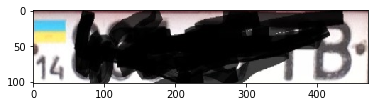

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/261399540.png
PREDICTED: 0
ANNOTATED: 4


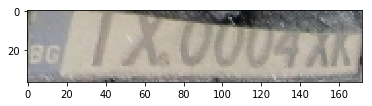

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260071500.png
PREDICTED: 0
ANNOTATED: 4


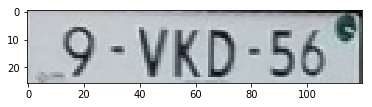

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260555642.png
PREDICTED: 0
ANNOTATED: 4


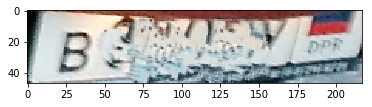

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero245541647-0.png
PREDICTED: 0
ANNOTATED: 1


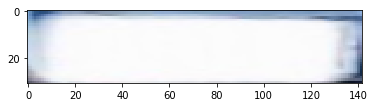

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260555644.png
PREDICTED: 0
ANNOTATED: 4


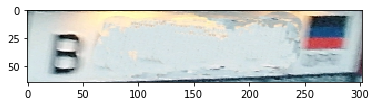

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260299181.png
PREDICTED: 2
ANNOTATED: 1


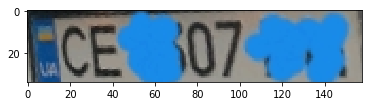

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/259989513.png
PREDICTED: 2
ANNOTATED: 0


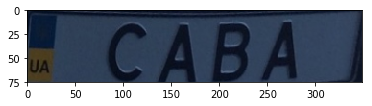

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260248820.png
PREDICTED: 1
ANNOTATED: 4


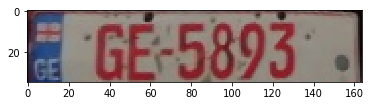

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260015297.png
PREDICTED: 2
ANNOTATED: 1


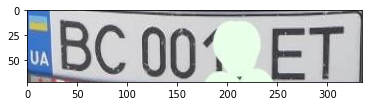

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260062273.png
PREDICTED: 1
ANNOTATED: 2


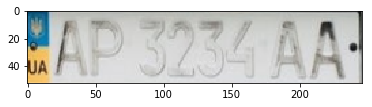

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero246943645-0.png
PREDICTED: 0
ANNOTATED: 1


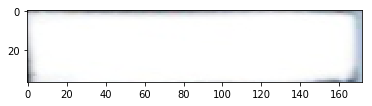

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260098114.png
PREDICTED: 2
ANNOTATED: 0


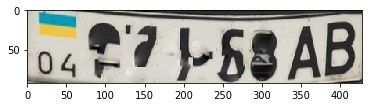

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260224162.png
PREDICTED: 1
ANNOTATED: 4


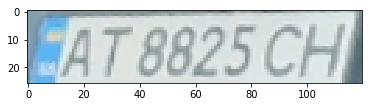

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero248259401-0.png
PREDICTED: 0
ANNOTATED: 2


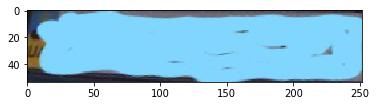

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero248259401-0.png
PREDICTED: 0
ANNOTATED: 1


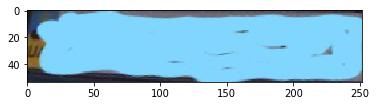

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero236781007-0.png
PREDICTED: 7
ANNOTATED: 0


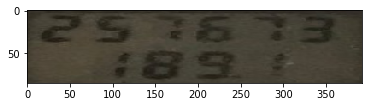

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero236781007-0.png
PREDICTED: 2
ANNOTATED: 0


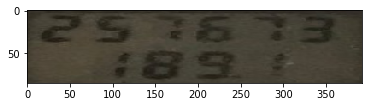

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260767832.png
PREDICTED: 4
ANNOTATED: 3


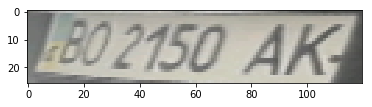

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260266141.png
PREDICTED: 4
ANNOTATED: 0


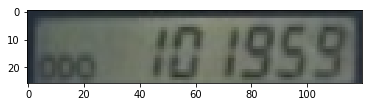

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260600020.png
PREDICTED: 1
ANNOTATED: 4


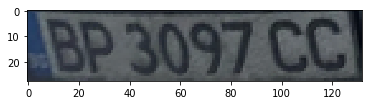

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260058533.png
PREDICTED: 1
ANNOTATED: 4


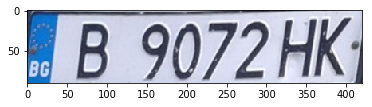

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/261245270.png
PREDICTED: 2
ANNOTATED: 1


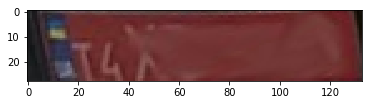

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/257960144.png
PREDICTED: 2
ANNOTATED: 1


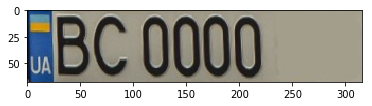

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero246694854-0.png
PREDICTED: 0
ANNOTATED: 1


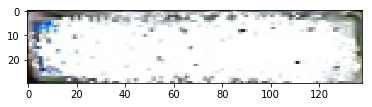

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/259956307.png
PREDICTED: 2
ANNOTATED: 1


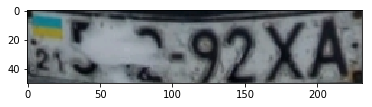

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero249285147-0.png
PREDICTED: 1
ANNOTATED: 4


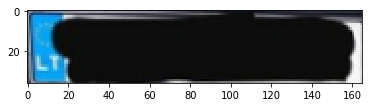

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260685008.png
PREDICTED: 2
ANNOTATED: 1


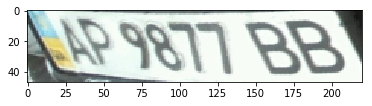

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260102946.png
PREDICTED: 1
ANNOTATED: 0


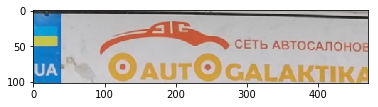

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260246178.png
PREDICTED: 1
ANNOTATED: 0


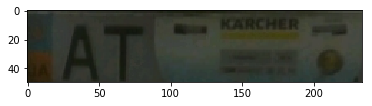

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero248165813-0.png
PREDICTED: 4
ANNOTATED: 0


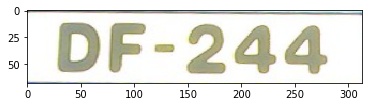

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260245009.png
PREDICTED: 1
ANNOTATED: 0


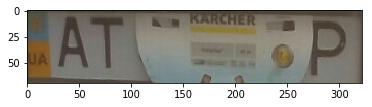

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero246944741-0.png
PREDICTED: 0
ANNOTATED: 1


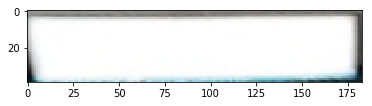

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260701244.png
PREDICTED: 2
ANNOTATED: 0


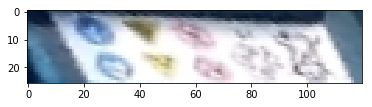

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/0641DX-0.png
PREDICTED: 0
ANNOTATED: 7


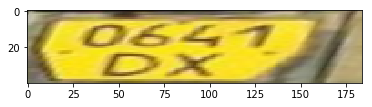

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260592392.png
PREDICTED: 0
ANNOTATED: 2


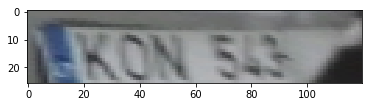

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/259982450.png
PREDICTED: 3
ANNOTATED: 4


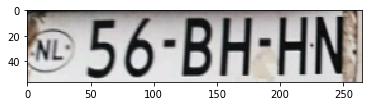

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero195228920-0.png
PREDICTED: 2
ANNOTATED: 0


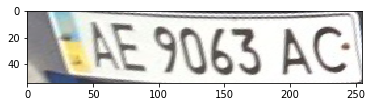

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero195228920-0.png
PREDICTED: 2
ANNOTATED: 0


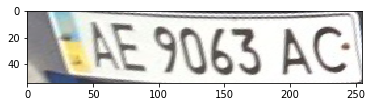

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260239338.png
PREDICTED: 7
ANNOTATED: 0


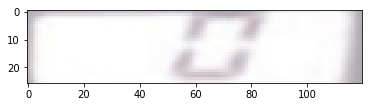

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260074987.png
PREDICTED: 1
ANNOTATED: 4


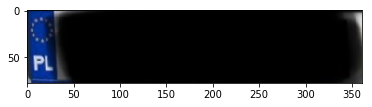

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero245793714-0.png
PREDICTED: 0
ANNOTATED: 4


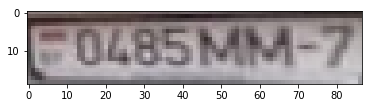

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero119914964-0.png
PREDICTED: 0
ANNOTATED: 1


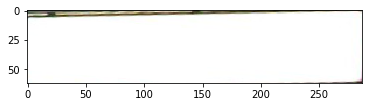

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero119914953-0.png
PREDICTED: 0
ANNOTATED: 1


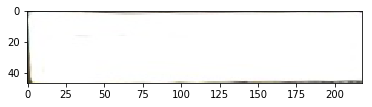

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260224176.png
PREDICTED: 4
ANNOTATED: 1


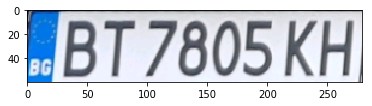

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero112399356-0.png
PREDICTED: 1
ANNOTATED: 0


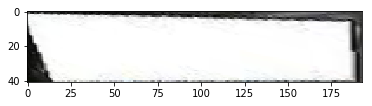

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260026227.png
PREDICTED: 2
ANNOTATED: 1


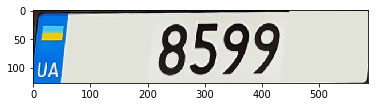

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/257960219.png
PREDICTED: 2
ANNOTATED: 1


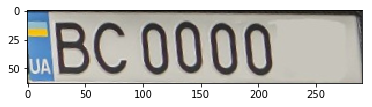

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/261058961.png
PREDICTED: 2
ANNOTATED: 4


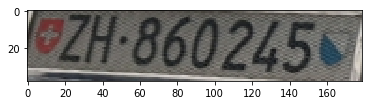

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero247867328-0.png
PREDICTED: 0
ANNOTATED: 1


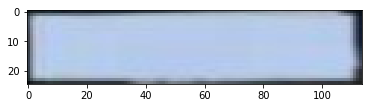

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260077185.png
PREDICTED: 2
ANNOTATED: 1


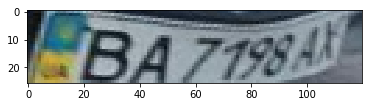

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260248568.png
PREDICTED: 7
ANNOTATED: 0


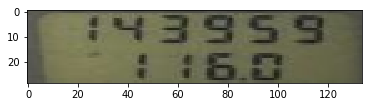

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260248568.png
PREDICTED: 2
ANNOTATED: 0


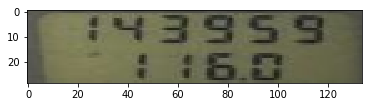

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260247418.png
PREDICTED: 2
ANNOTATED: 4


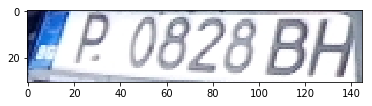

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero245541641-0.png
PREDICTED: 0
ANNOTATED: 1


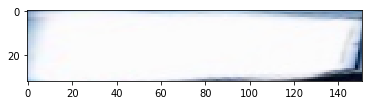

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260786930.png
PREDICTED: 3
ANNOTATED: 2


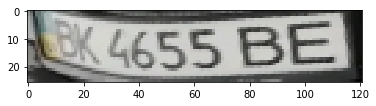

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260894525.png
PREDICTED: 2
ANNOTATED: 3


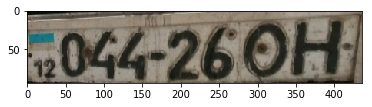

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/259940468.png
PREDICTED: 7
ANNOTATED: 0


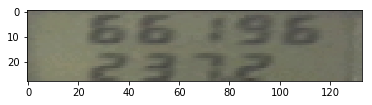

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/259940468.png
PREDICTED: 2
ANNOTATED: 0


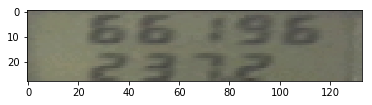

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260262295.png
PREDICTED: 2
ANNOTATED: 1


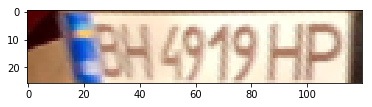

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260582641.png
PREDICTED: 2
ANNOTATED: 1


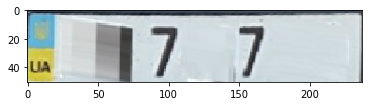

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero248332384-0.png
PREDICTED: 0
ANNOTATED: 1


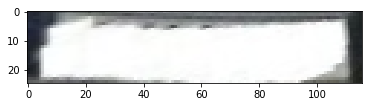

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/261507585.png
PREDICTED: 5
ANNOTATED: 0


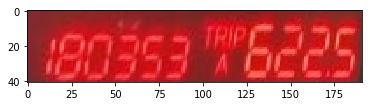

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260237557.png
PREDICTED: 0
ANNOTATED: 1


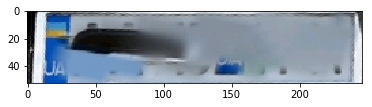

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260563007.png
PREDICTED: 2
ANNOTATED: 1


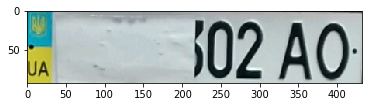

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260747776.png
PREDICTED: 2
ANNOTATED: 3


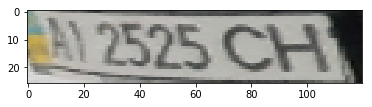

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260651311.png
PREDICTED: 2
ANNOTATED: 0


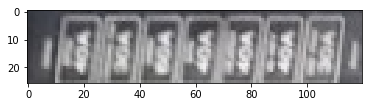

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero248257935-0.png
PREDICTED: 4
ANNOTATED: 0


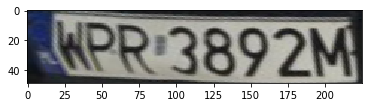

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero248257935-0.png
PREDICTED: 2
ANNOTATED: 0


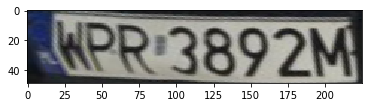

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260226534.png
PREDICTED: 2
ANNOTATED: 1


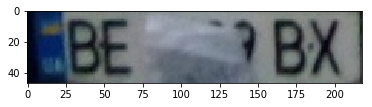

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260562981.png
PREDICTED: 2
ANNOTATED: 1


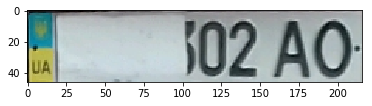

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260708490.png
PREDICTED: 2
ANNOTATED: 0


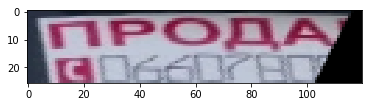

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/259938403.png
PREDICTED: 4
ANNOTATED: 0


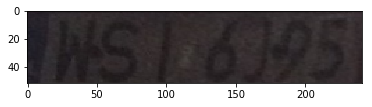

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/259938403.png
PREDICTED: 2
ANNOTATED: 0


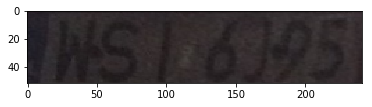

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260697302.png
PREDICTED: 4
ANNOTATED: 3


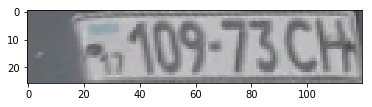

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero248213202-0.png
PREDICTED: 4
ANNOTATED: 0


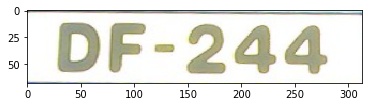

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260238738.png
PREDICTED: 0
ANNOTATED: 3


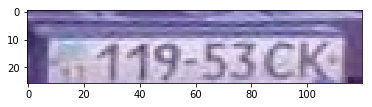

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260238738.png
PREDICTED: 0
ANNOTATED: 2


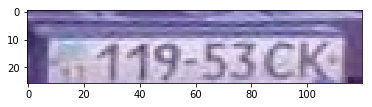

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero247867314-0.png
PREDICTED: 0
ANNOTATED: 1


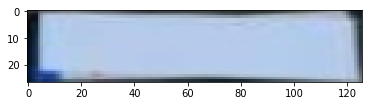

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260222162.png
PREDICTED: 2
ANNOTATED: 1


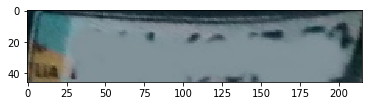

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero246983771-0.png
PREDICTED: 2
ANNOTATED: 0


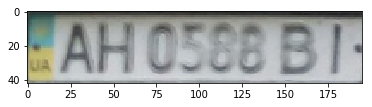

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero246983771-0.png
PREDICTED: 2
ANNOTATED: 0


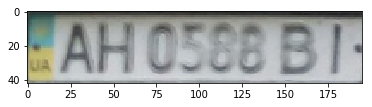

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero248731669-0.png
PREDICTED: 2
ANNOTATED: 1


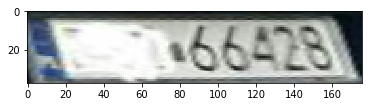

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260682006.png
PREDICTED: 2
ANNOTATED: 0


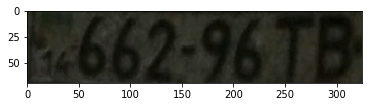

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero119914950-0.png
PREDICTED: 0
ANNOTATED: 1


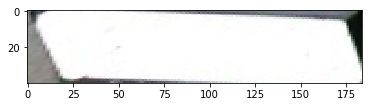

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260249070.png
PREDICTED: 2
ANNOTATED: 0


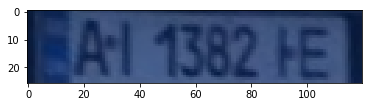

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/261415794.png
PREDICTED: 4
ANNOTATED: 0


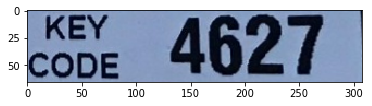

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/259973474.png
PREDICTED: 4
ANNOTATED: 0


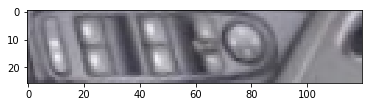

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260647975.png
PREDICTED: 2
ANNOTATED: 1


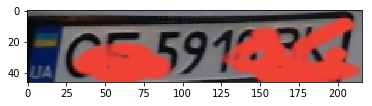

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260247633.png
PREDICTED: 1
ANNOTATED: 0


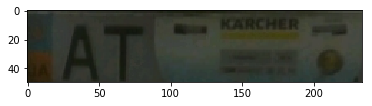

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero248281819-0.png
PREDICTED: 2
ANNOTATED: 0


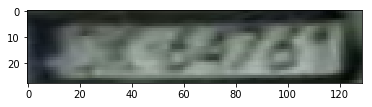

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero248062540-0.png
PREDICTED: 0
ANNOTATED: 1


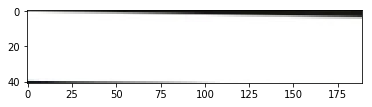

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260265519.png
PREDICTED: 2
ANNOTATED: 0


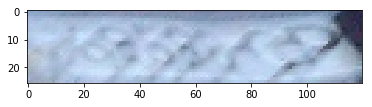

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero245295390-0.png
PREDICTED: 0
ANNOTATED: 1


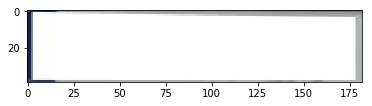

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/259973932.png
PREDICTED: 2
ANNOTATED: 1


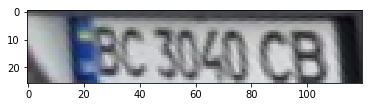

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero244919344-0.png
PREDICTED: 1
ANNOTATED: 0


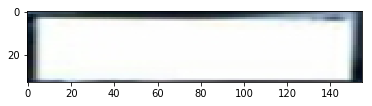

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260846662.png
PREDICTED: 3
ANNOTATED: 2


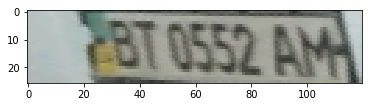

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/261073282.png
PREDICTED: 4
ANNOTATED: 0


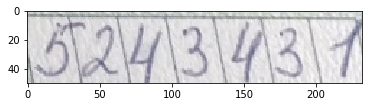

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/261073282.png
PREDICTED: 2
ANNOTATED: 0


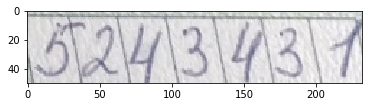

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260243875.png
PREDICTED: 0
ANNOTATED: 1


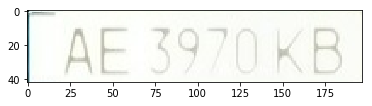

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260243875.png
PREDICTED: 0
ANNOTATED: 2


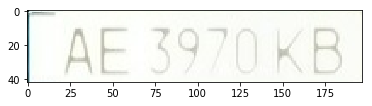

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260911707.png
PREDICTED: 2
ANNOTATED: 3


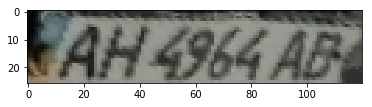

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/12587103.jpg-0.png
PREDICTED: 3
ANNOTATED: 7


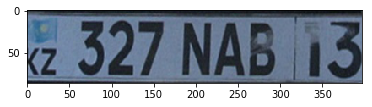

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260048921.png
PREDICTED: 2
ANNOTATED: 1


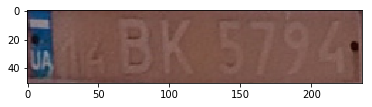

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260030467.png
PREDICTED: 6
ANNOTATED: 4


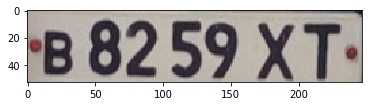

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260087813.png
PREDICTED: 1
ANNOTATED: 4


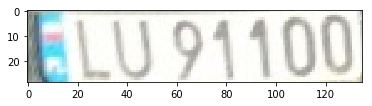

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260236871.png
PREDICTED: 4
ANNOTATED: 1


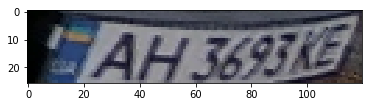

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260566718.png
PREDICTED: 0
ANNOTATED: 3


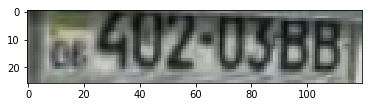

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/259962683.png
PREDICTED: 1
ANNOTATED: 4


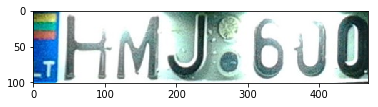

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260032464.png
PREDICTED: 3
ANNOTATED: 4


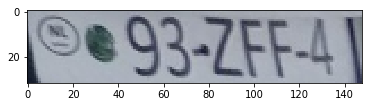

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260603137.png
PREDICTED: 1
ANNOTATED: 2


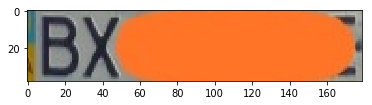

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260562987.png
PREDICTED: 2
ANNOTATED: 1


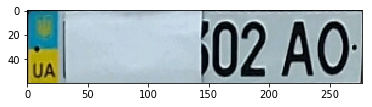

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero246943542-0.png
PREDICTED: 0
ANNOTATED: 1


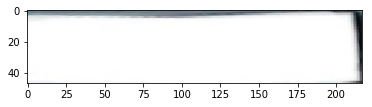

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/K285AA52_1.png
PREDICTED: 0
ANNOTATED: 6


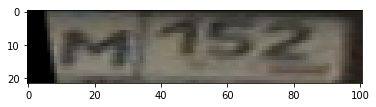

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/K285AA52_1.png
PREDICTED: 0
ANNOTATED: 2


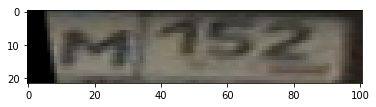

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260000423.png
PREDICTED: 2
ANNOTATED: 0


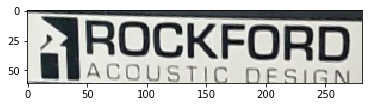

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260241786.png
PREDICTED: 2
ANNOTATED: 0


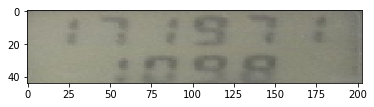

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260788448.png
PREDICTED: 3
ANNOTATED: 1


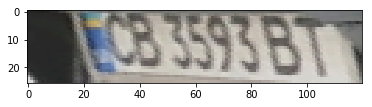

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260603057.png
PREDICTED: 5
ANNOTATED: 2


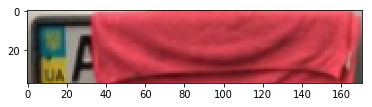

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero112399333-0.png
PREDICTED: 1
ANNOTATED: 0


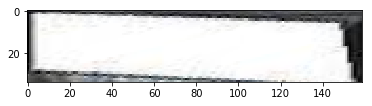

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260807392.png
PREDICTED: 7
ANNOTATED: 0


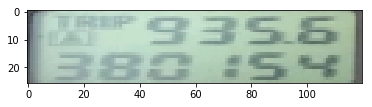

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260807392.png
PREDICTED: 2
ANNOTATED: 0


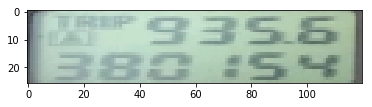

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260247533.png
PREDICTED: 2
ANNOTATED: 0


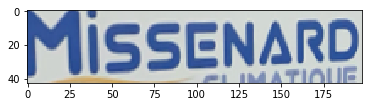

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260224168.png
PREDICTED: 4
ANNOTATED: 1


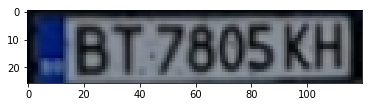

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260233070.png
PREDICTED: 0
ANNOTATED: 4


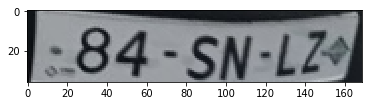

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260241756.png
PREDICTED: 1
ANNOTATED: 0


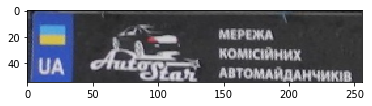

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/261134522.png
PREDICTED: 7
ANNOTATED: 0


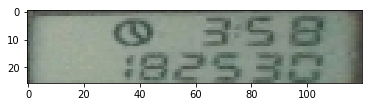

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/261134522.png
PREDICTED: 2
ANNOTATED: 0


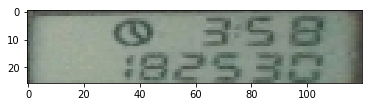

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260245896.png
PREDICTED: 5
ANNOTATED: 0


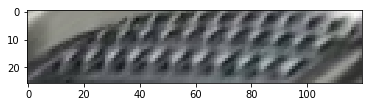

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260235689.png
PREDICTED: 0
ANNOTATED: 4


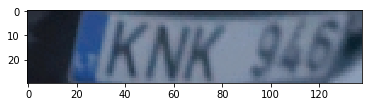

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260237349.png
PREDICTED: 0
ANNOTATED: 2


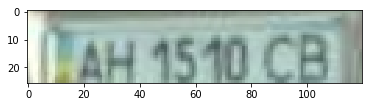

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260237349.png
PREDICTED: 0
ANNOTATED: 1


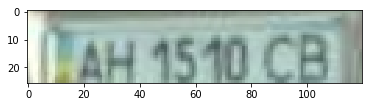

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/261021231.png
PREDICTED: 7
ANNOTATED: 4


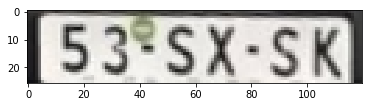

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260072861.png
PREDICTED: 2
ANNOTATED: 1


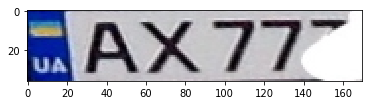

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero245434908-0.png
PREDICTED: 0
ANNOTATED: 1


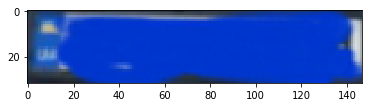

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260557542.png
PREDICTED: 0
ANNOTATED: 2


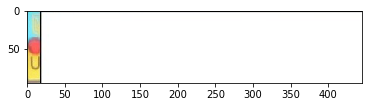

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260557542.png
PREDICTED: 0
ANNOTATED: 1


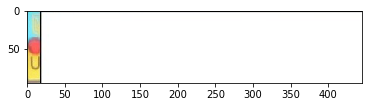

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260242688.png
PREDICTED: 2
ANNOTATED: 0


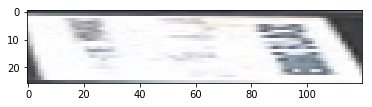

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero248731655-0.png
PREDICTED: 0
ANNOTATED: 1


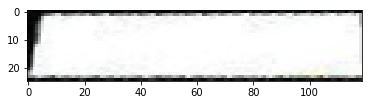

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero246944759-0.png
PREDICTED: 0
ANNOTATED: 1


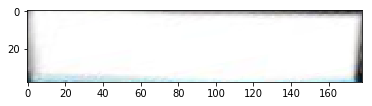

REGION NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/260063095.png
PREDICTED: 1
ANNOTATED: 4


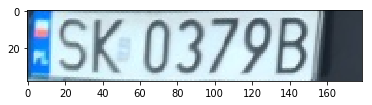

STATE NOT CORRECT IN /mnt/data/var/www/html2/js/nomeroff-net_2/datasets/options/train/img/option_zero245295362-0.png
PREDICTED: 0
ANNOTATED: 1


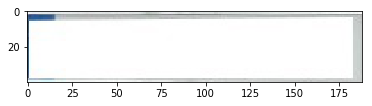

Counter({'GOOD': 58465, 'BAD': 189})


In [13]:
valDir = os.path.join(NOMEROFF_NET_DIR, "datasets/options/train")
optionChecker(valDir)